In [2]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

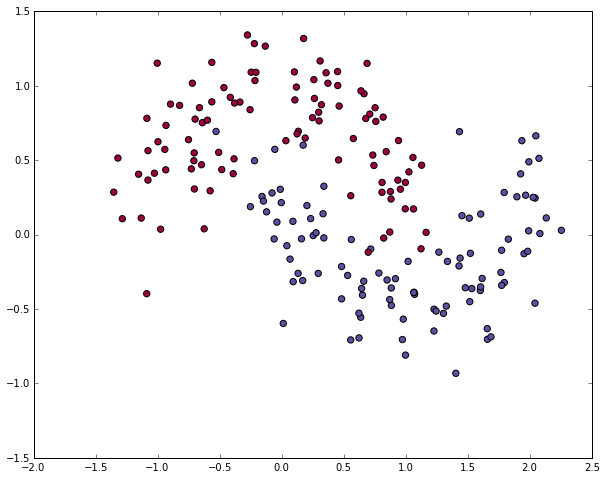

In [4]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [5]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

200/200 [==============================] - 0s
[0.063704311847686768, 0.97500002384185791]


Using TensorFlow backend.


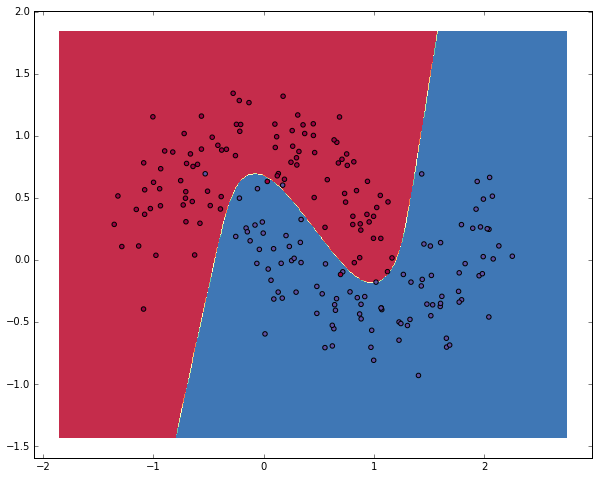

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


# arrange y in two classes
_y = (np.arange(2) == y[:, None]).astype(np.float32)


# network dimensions
idim = 2   # features
hdim = 3   # hidden
odim = 2   # classes

model = Sequential()
model.add(Dense(hdim, input_dim=idim, init='uniform'))
model.add(Activation('tanh'))
model.add(Dense(odim, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(X, _y, nb_epoch=5000, batch_size=200, show_accuracy=True, verbose=0)

print model.evaluate(X, _y, batch_size=200, show_accuracy=True)

plot_decision_boundary(model)
